## Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, shuffle
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

## Load dataset

In [2]:
data = pd.read_csv("water_potability.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Check null values

In [6]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## EDA

Text(0.5, 0.98, 'Potability of Water')

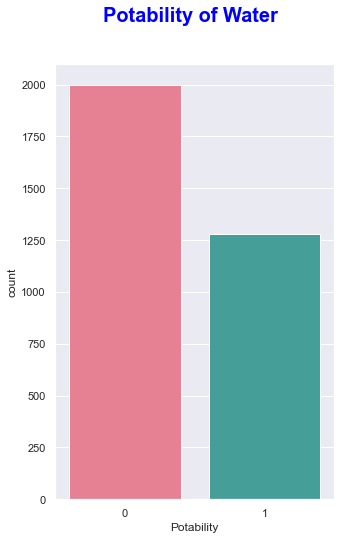

In [7]:
plt.figure(figsize=(5,8))
sns.set_theme(style="darkgrid")
sns.countplot(data['Potability'], palette='husl')
plt.suptitle("Potability of Water", size=20, color="Blue", weight="bold")

Text(0.5, 1.0, 'Distribution')

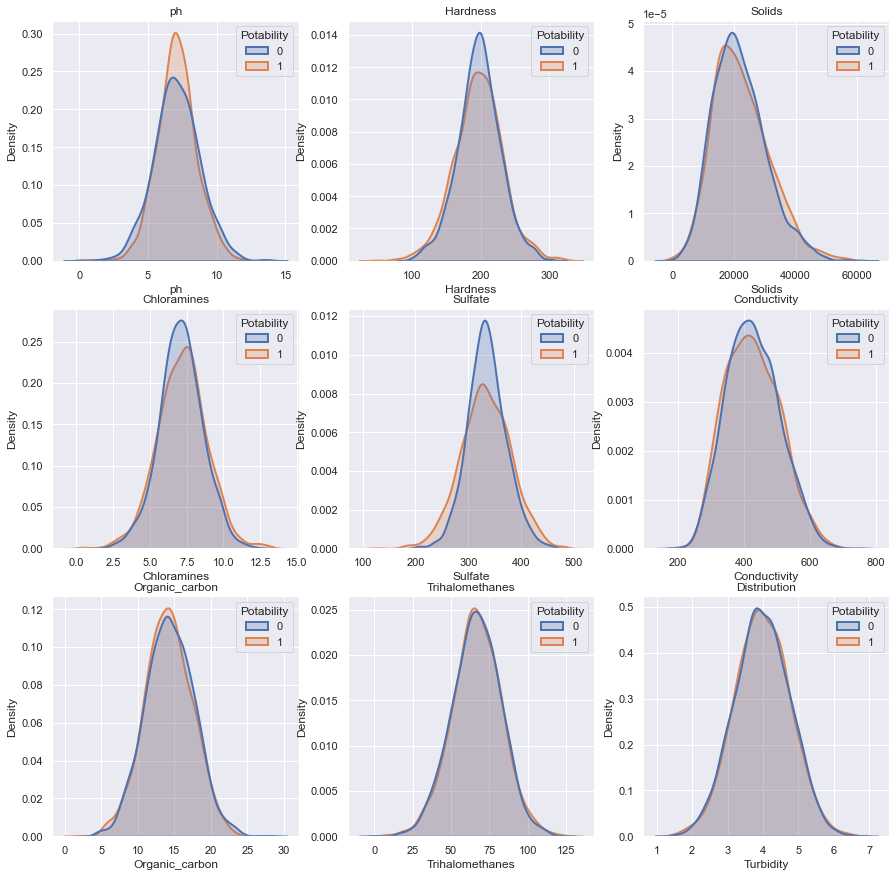

In [8]:
plt.figure(figsize=(15,15))
for ax, col in enumerate(data.columns[:9]):
    plt.subplot(3, 3, ax+1)
    plt.title(col)
    sns.kdeplot(x = data[col], fill=True, common_norm=False, color="#459E97", linewidth=2, hue=data["Potability"])
plt.title("Distribution")

Text(0.5, 1.0, 'BoxPlot')

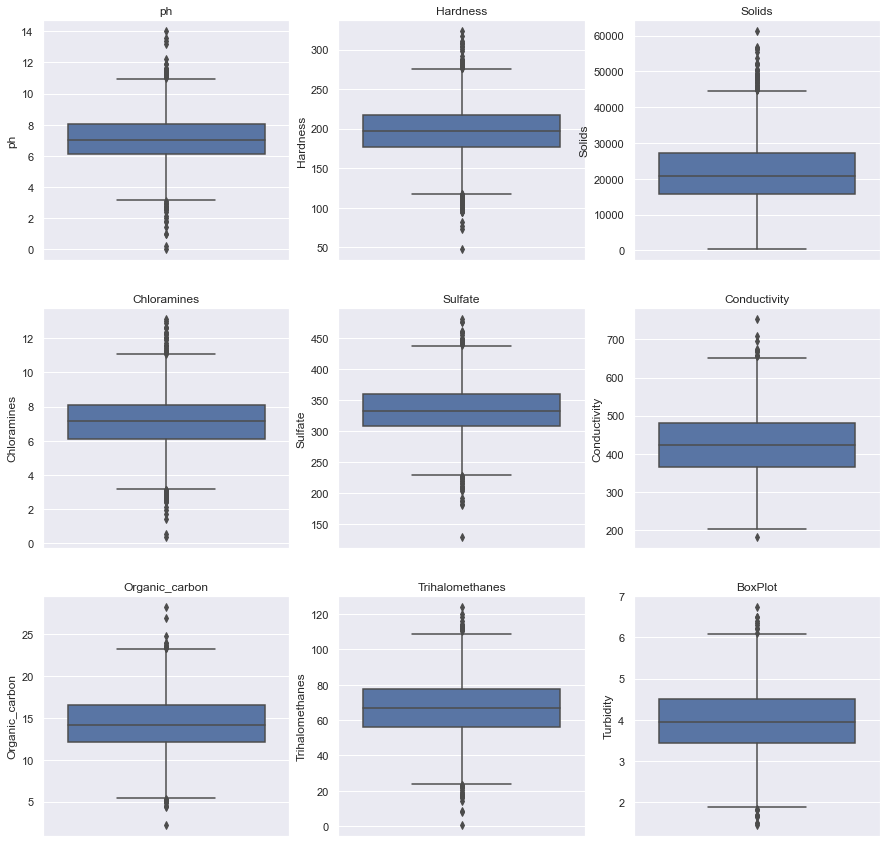

In [9]:
plt.figure(figsize=(15,15))
for ax, col in enumerate(data.columns[:9]):
    plt.subplot(3, 3, ax+1)
    plt.title(col)
    sns.boxplot(y = data[col], hue=data["ph"])
plt.title("BoxPlot")

<AxesSubplot:>

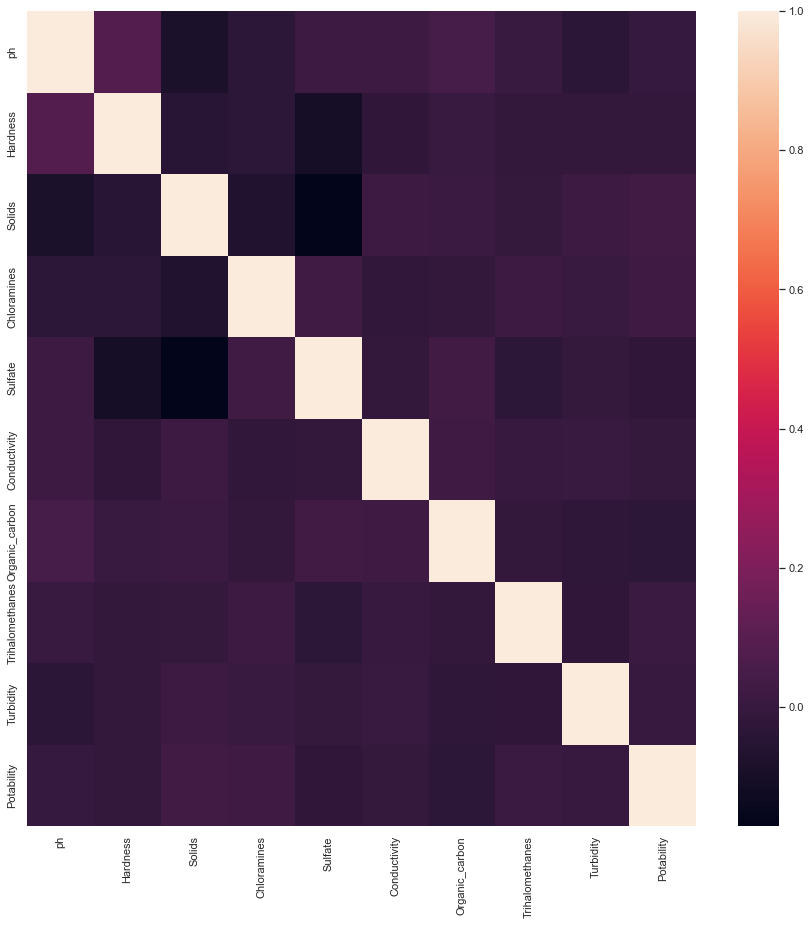

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr())

Text(0.5, 1.0, 'DistPlot')

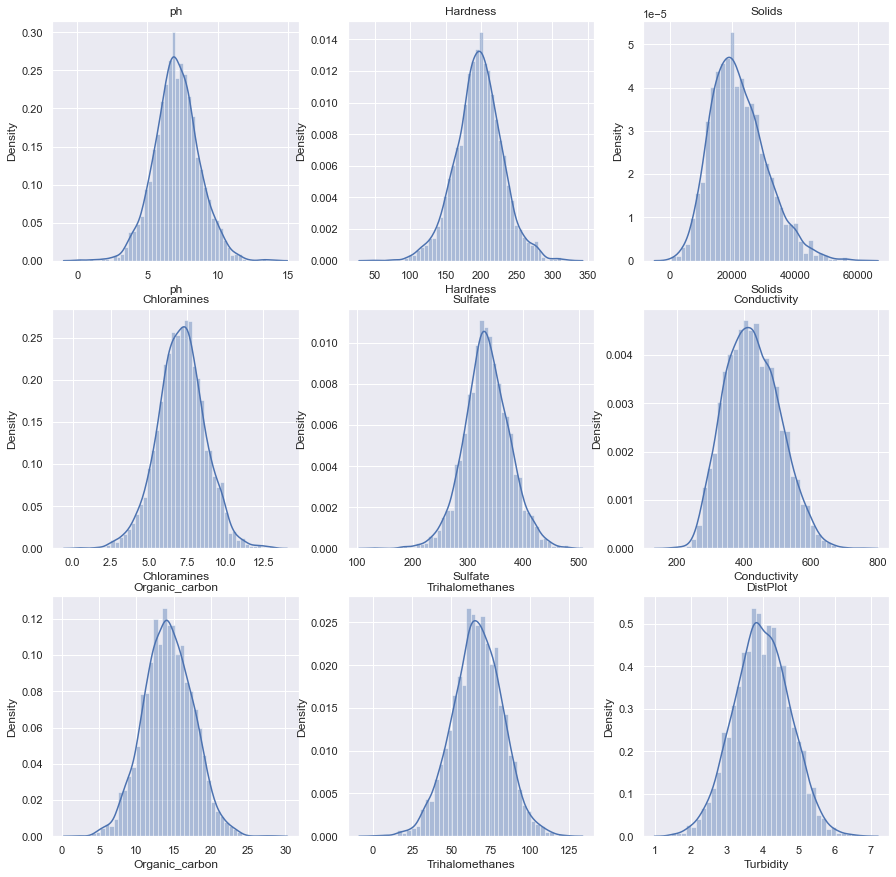

In [11]:
plt.figure(figsize=(15,15))
for ax, col in enumerate(data.columns[:9]):
    plt.subplot(3, 3, ax+1)
    plt.title(col)
    sns.distplot(data[col])
plt.title("DistPlot")

In [12]:
data_copy = data.copy()

## Balance data

In [13]:
data_copy.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [14]:
notpotable  = data_copy[data_copy['Potability']==0]
potable = data_copy[data_copy['Potability']==1]  

df_minority_upsampled = resample(potable, replace = True, n_samples = 2000) 

data_copy = pd.concat([notpotable, df_minority_upsampled])
data_copy = shuffle(data_copy)

## Split data into train and test dataset

In [15]:
target = data_copy['Potability']
data_copy = data_copy.drop('Potability', axis=1)

train_X_copy, test_X_copy, train_y_copy, test_y_copy = train_test_split(data_copy, target, test_size=0.2)

In [16]:
num_cols = data_copy.columns.to_list()

## Model and Pipeline

In [17]:
model = RandomForestClassifier(n_estimators=600, min_samples_leaf=2)

In [18]:
num_trans = Pipeline(steps=[
                ('num_imputer', SimpleImputer(strategy='mean')),
                ('num_scalar', RobustScaler())])

preprocess = ColumnTransformer(transformers=[
                ('num', num_trans, num_cols)])

model_pipe = Pipeline(steps=[
                    ('preprocessor', preprocess),
                    ('model', model)])

In [19]:
model_pipe.fit(train_X_copy, train_y_copy)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scalar',
                                                                   RobustScaler())]),
                                                  ['ph', 'Hardness', 'Solids',
                                                   'Chloramines', 'Sulfate',
                                                   'Conductivity',
                                                   'Organic_carbon',
                                                   'Trihalomethanes',
                                                   'Turbidity'])])),
                ('model',
                 RandomForestClassifier(min_samples_leaf=2, n_estimators=600))])

In [20]:
pred = model_pipe.predict(test_X_copy)
accuracy_score(test_y_copy, pred)*100

86.0

In [21]:
import pickle

In [28]:
pickle.dump(model_pipe, open('model.pkl', 'wb'))